In [1]:
#Importing all the necessary packages
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_curve,average_precision_score,plot_precision_recall_curve,plot_roc_curve
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from statsmodels.discrete.discrete_model import Logit
from sklearn import metrics
from statsmodels.tools import add_constant
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve, auc, f1_score, plot_confusion_matrix, precision_score, recall_score
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.datasets import make_blobs
import statsmodels.api as sm
from statsmodels.discrete.discrete_model import Logit
from statsmodels.tools import add_constant
%matplotlib inline

In [2]:
df = pd.read_csv('QRdummydata.csv')
df = df.drop(columns = "Unnamed: 0")

,HSG,SAT,IndGrd,Sex_F,Sex_M,Region_East Asia,Region_Europe,Region_North America,Region_Other,Region_Singapore,...,AC2_Life Sciences,AC2_Literature,"AC2_Mathematical, Computational and Statistical Sciences",AC2_Philosophy,"AC2_Philosophy, Politics and Economics",AC2_Physical Sciences,AC2_Psychology,AC2_Undecided,AC2_Undeclared,AC2_Urban Studies
0,3,770,1.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,4,680,0.0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
2,4,730,0.0,1,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
3,3,790,0.0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,3,800,1.0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1235,3,770,0.0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1236,4,750,0.0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1237,4,780,0.0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1238,3,800,0.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
from sklearn.model_selection import train_test_split
X1 = df.drop(['IndGrd'], axis=1)
X = X1.values
y = df['IndGrd'].values #IndGrd is our predictor
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
#Functions needed

# Define a function that plots the precision-recall-curve and the F1 score and AUC score
def precision_recall_curve_and_scores(X_test, y_test, y_pred, y_pred_probabilities, classifier_name):
    
    y_pred_prob = y_pred_probabilities[:,1]
    precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
    
    plt.plot(recall, precision, label=f'{classifier_name}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'{classifier_name} - Precision-Recall Curve')
    plt.show()
    
    f1_score_result, auc_score_result = f1_score(y_test, y_pred), auc(recall, precision)
    
    return print(f'F1 Score: {f1_score_result} \nAUC Score (PR): {auc_score_result}\n')

def ROC(X_test, y_test, y_pred_logreg_prob, logreg):
    y_pred_prob = y_pred_logreg_prob[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    plt.plot(fpr, tpr, label=f'{logreg}')
    plt.plot([0, 1], [0, 1])
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title(f'{logreg} - Reciever Operating Characteristc (ROC) Curve')
    plt.show()
    return print(f'Area Under Curve (AUC) Score: {roc_auc_score(y_test, y_pred_prob)}\n');

def confusion_matrix_plot(X_train, y_train, X_test, y_test, classifier, y_pred, classifier_name):
    fig, ax = plt.subplots(figsize=(7, 6))
    plot_confusion_matrix(classifier, X_test, y_test, display_labels=["Good Student", "Bad Student"], cmap=plt.cm.Blues, normalize=None, ax=ax)
    ax.set_title(f'{classifier_name} - Confusion Matrix')
    plt.show()

    fig, ax = plt.subplots(figsize=(7, 6))
    plot_confusion_matrix(classifier, X_test, y_test, display_labels=["Good Student", "Bad Student"], cmap=plt.cm.Blues, normalize='true', ax=ax)
    ax.set_title(f'{classifier_name} - Confusion Matrix (norm.)')
    plt.show()
    
    print(f'Accuracy Score Test: {accuracy_score(y_test, y_pred)}')
    print(f'Accuracy Score Train: {classifier.score(X_train, y_train)} (as comparison)')
    return print("")


## SVM: Linear Kernel

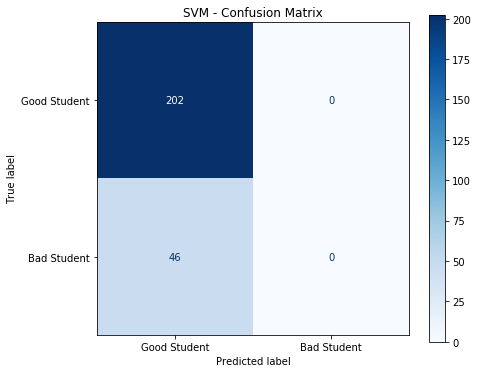

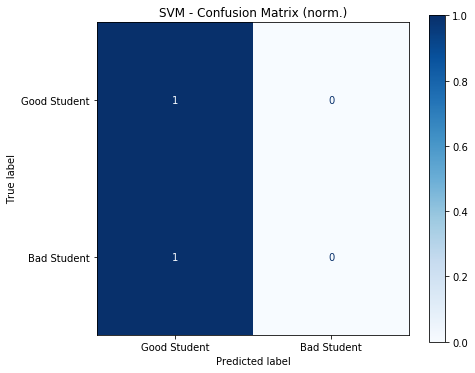

Accuracy Score Test: 0.8145161290322581
Accuracy Score Train: 0.8084677419354839 (as comparison)



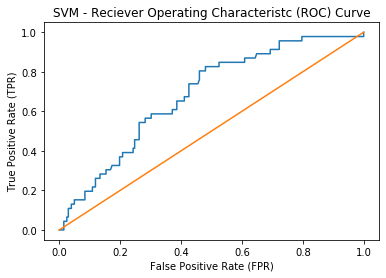

Area Under Curve (AUC) Score: 0.683544984933276



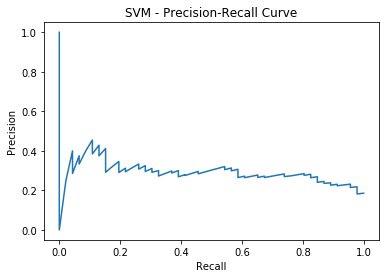

F1 Score: 0.0 
AUC Score (PR): 0.2876274692100371



In [5]:
from sklearn.svm import SVC
# Instanciate and train the SVM model on the training set.
support_vector_m = SVC(kernel='linear', probability=True) #Using Linear Kernel
support_vector_m.fit(X_train,y_train)

# Make predictions (classes and probabilities) with the trained model on the test set.
y_pred_svm = support_vector_m.predict(X_test)
y_pred_svm_prob = support_vector_m.predict_proba(X_test)

# Plot model evaluations.
confusion_matrix_plot(X_train, y_train, X_test, y_test, support_vector_m, y_pred_svm, 'SVM')
ROC(X_test, y_test, y_pred_svm_prob, 'SVM')
precision_recall_curve_and_scores(X_test, y_test, y_pred_svm, y_pred_svm_prob, 'SVM')

## SVM: poly Kernel

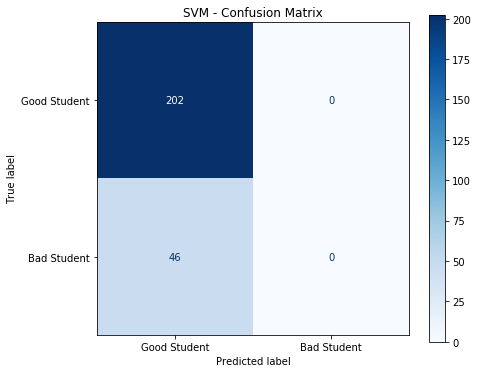

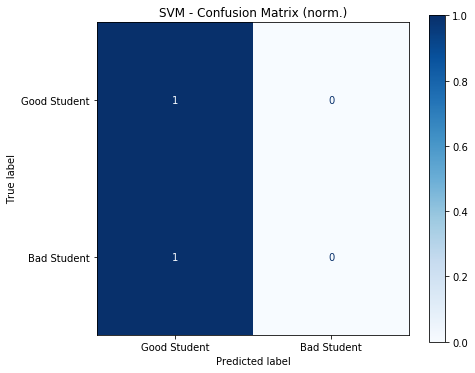

Accuracy Score Test: 0.8145161290322581
Accuracy Score Train: 0.8084677419354839 (as comparison)



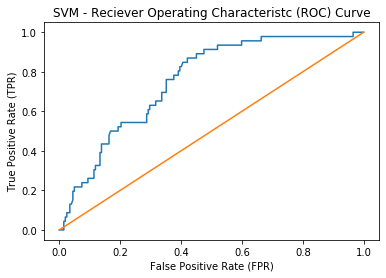

Area Under Curve (AUC) Score: 0.754896685320706



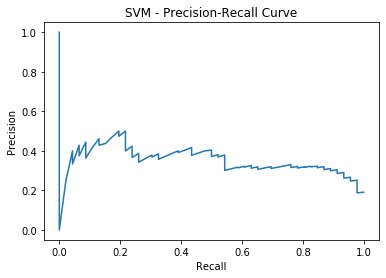

F1 Score: 0.0 
AUC Score (PR): 0.3488016744885525



In [6]:
support_vector_m = SVC(kernel='poly', probability=True) #Using Linear Kernel
support_vector_m.fit(X_train,y_train)
# Make predictions (classes and probabilities) with the trained model on the test set.
y_pred_svm = support_vector_m.predict(X_test)
y_pred_svm_prob = support_vector_m.predict_proba(X_test)
# Plot model evaluations.
confusion_matrix_plot(X_train, y_train, X_test, y_test, support_vector_m, y_pred_svm, 'SVM')
ROC(X_test, y_test, y_pred_svm_prob, 'SVM')
precision_recall_curve_and_scores(X_test, y_test, y_pred_svm, y_pred_svm_prob, 'SVM')

## SVM: rbf kernel

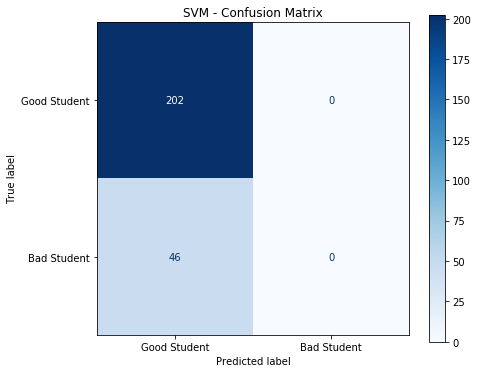

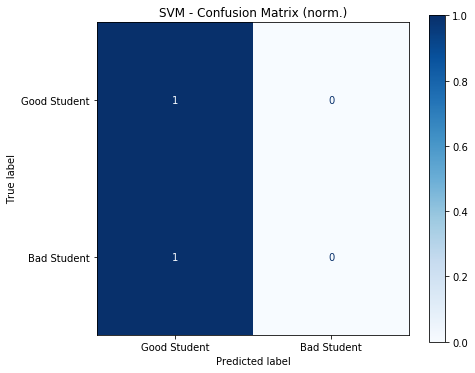

Accuracy Score Test: 0.8145161290322581
Accuracy Score Train: 0.8084677419354839 (as comparison)



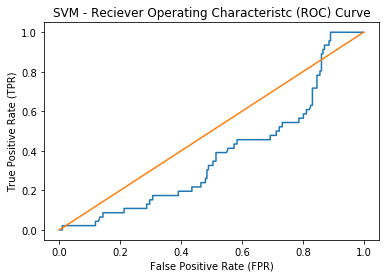

Area Under Curve (AUC) Score: 0.37726000860955666



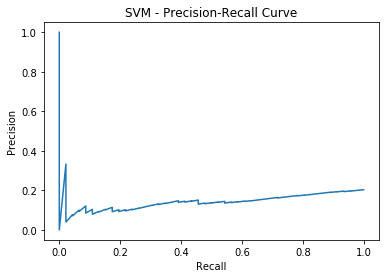

F1 Score: 0.0 
AUC Score (PR): 0.14232918229139593



In [7]:
from sklearn.svm import SVC
support_vector_m = SVC(kernel='rbf', probability=True) #Using Linear Kernel
support_vector_m.fit(X_train,y_train)
# Make predictions (classes and probabilities) with the trained model on the test set.
y_pred_svm = support_vector_m.predict(X_test)
y_pred_svm_prob = support_vector_m.predict_proba(X_test)
# Plot model evaluations.
confusion_matrix_plot(X_train, y_train, X_test, y_test, support_vector_m, y_pred_svm, 'SVM')
ROC(X_test, y_test, y_pred_svm_prob, 'SVM')
precision_recall_curve_and_scores(X_test, y_test, y_pred_svm, y_pred_svm_prob, 'SVM')

### Using different kernels affects the accuracy of the model. Sigmoid kernel is the most inaccurate, followed by linear and poly. The rbf kernel (default) gives the highest accuracy rates of 85%.